In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd 
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

**Test Anomaly (Artificial Data)**

In [ ]:
#Test Anomaly (Artificial Data)
df=pd.read_csv('/content/gdrive/MyDrive/TelinData/test_anomaly2.csv',skiprows=10)

#GGC DATA
#df=pd.read_csv('/content/gdrive/MyDrive/TelinData/123546_ggc.csv',skiprows=9)

#Facebook
#df=pd.read_csv('/content/gdrive/MyDrive/TelinData/98659_facebook.csv',skiprows=9)

#GOOGLE
#df=pd.read_csv('/content/gdrive/MyDrive/TelinData/20201214-mrtg-backbone-anomaly-google-outage.csv',skiprows=9)


df

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G
0,2020-12-02 20:25:00,1.051731e+11,1.040668e+11,1.552302e+11,1.547158e+11,1.553040e+11,1.230808e+11,1.182693e+11,1.385486e+11,1.534982e+11,1.442565e+11,1.351946e+11,1.287516e+11,1.534192e+11,3.065666e+07,3.426789e+07,3.535916e+07,3.733736e+07,NaN
1,2020-12-02 20:30:00,1.061612e+11,1.056285e+11,1.571235e+11,1.553037e+11,1.553193e+11,1.236698e+11,1.190179e+11,1.397005e+11,1.538645e+11,1.437841e+11,1.361744e+11,1.292748e+11,1.528106e+11,3.275554e+07,3.464872e+07,3.389663e+07,3.485004e+07,NaN
2,2020-12-02 20:35:00,1.085609e+11,1.074602e+11,1.596225e+11,1.594324e+11,1.580613e+11,1.259542e+11,1.201071e+11,1.409407e+11,1.581453e+11,1.455181e+11,1.379725e+11,1.304552e+11,1.600041e+11,3.209926e+07,3.650548e+07,3.341284e+07,3.388074e+07,NaN
3,2020-12-02 20:40:00,1.069858e+11,1.067078e+11,1.590639e+11,1.606047e+11,1.564439e+11,1.241095e+11,1.186069e+11,1.408106e+11,1.559666e+11,1.445938e+11,1.380490e+11,1.295606e+11,1.574781e+11,3.329102e+07,3.455776e+07,3.318801e+07,3.464369e+07,NaN
4,2020-12-02 20:45:00,1.134019e+11,1.123266e+11,1.617035e+11,1.660151e+11,1.596489e+11,1.301516e+11,1.218894e+11,1.458381e+11,1.609219e+11,1.482069e+11,1.415933e+11,1.318715e+11,1.647370e+11,3.683320e+07,3.303953e+07,3.380586e+07,3.467502e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2020-12-09 02:35,2.292790e+10,2.389050e+10,3.373415e+10,6.889913e+10,2.235300e+10,2.352853e+10,1.125823e+10,2.316071e+10,2.369615e+10,1.891017e+10,2.623651e+10,1.798078e+10,3.005703e+10,3.255165e+07,2.410722e+07,3.318346e+07,3.462583e+07,4000.0
1803,2020-12-09 02:40,2.267087e+10,2.343621e+10,3.271838e+10,6.820284e+10,2.229367e+10,2.313127e+10,1.123737e+10,2.252566e+10,2.325874e+10,1.852326e+10,2.553804e+10,1.763675e+10,2.974060e+10,3.363463e+07,2.306172e+07,3.434111e+07,3.588703e+07,4000.0
1804,2020-12-09 02:45,2.205300e+10,2.295787e+10,3.152625e+10,6.620988e+10,2.206451e+10,2.257825e+10,1.092913e+10,2.188177e+10,2.261559e+10,1.849515e+10,2.480051e+10,1.741511e+10,2.896526e+10,3.722990e+07,2.322884e+07,3.439089e+07,3.497514e+07,4000.0
1805,2020-12-09 02:50,2.125327e+10,2.197948e+10,3.001874e+10,6.454252e+10,2.161509e+10,2.174892e+10,1.080422e+10,2.096579e+10,2.195932e+10,1.800335e+10,2.379315e+10,1.712177e+10,2.788978e+10,3.214173e+07,2.377698e+07,3.738527e+07,3.679255e+07,4000.0


In [ ]:
df["sum"] = df.sum(axis=1)
df[['Date','sum']]
df

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum
0,2020-12-02 20:25:00,1.051731e+11,1.040668e+11,1.552302e+11,1.547158e+11,1.553040e+11,1.230808e+11,1.182693e+11,1.385486e+11,1.534982e+11,1.442565e+11,1.351946e+11,1.287516e+11,1.534192e+11,3.065666e+07,3.426789e+07,3.535916e+07,3.733736e+07,NaN,1.769646e+12
1,2020-12-02 20:30:00,1.061612e+11,1.056285e+11,1.571235e+11,1.553037e+11,1.553193e+11,1.236698e+11,1.190179e+11,1.397005e+11,1.538645e+11,1.437841e+11,1.361744e+11,1.292748e+11,1.528106e+11,3.275554e+07,3.464872e+07,3.389663e+07,3.485004e+07,NaN,1.777969e+12
2,2020-12-02 20:35:00,1.085609e+11,1.074602e+11,1.596225e+11,1.594324e+11,1.580613e+11,1.259542e+11,1.201071e+11,1.409407e+11,1.581453e+11,1.455181e+11,1.379725e+11,1.304552e+11,1.600041e+11,3.209926e+07,3.650548e+07,3.341284e+07,3.388074e+07,NaN,1.812370e+12
3,2020-12-02 20:40:00,1.069858e+11,1.067078e+11,1.590639e+11,1.606047e+11,1.564439e+11,1.241095e+11,1.186069e+11,1.408106e+11,1.559666e+11,1.445938e+11,1.380490e+11,1.295606e+11,1.574781e+11,3.329102e+07,3.455776e+07,3.318801e+07,3.464369e+07,NaN,1.799117e+12
4,2020-12-02 20:45:00,1.134019e+11,1.123266e+11,1.617035e+11,1.660151e+11,1.596489e+11,1.301516e+11,1.218894e+11,1.458381e+11,1.609219e+11,1.482069e+11,1.415933e+11,1.318715e+11,1.647370e+11,3.683320e+07,3.303953e+07,3.380586e+07,3.467502e+07,NaN,1.858444e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2020-12-09 02:35,2.292790e+10,2.389050e+10,3.373415e+10,6.889913e+10,2.235300e+10,2.352853e+10,1.125823e+10,2.316071e+10,2.369615e+10,1.891017e+10,2.623651e+10,1.798078e+10,3.005703e+10,3.255165e+07,2.410722e+07,3.318346e+07,3.462583e+07,4000.0,3.467573e+11
1803,2020-12-09 02:40,2.267087e+10,2.343621e+10,3.271838e+10,6.820284e+10,2.229367e+10,2.313127e+10,1.123737e+10,2.252566e+10,2.325874e+10,1.852326e+10,2.553804e+10,1.763675e+10,2.974060e+10,3.363463e+07,2.306172e+07,3.434111e+07,3.588703e+07,4000.0,3.410406e+11
1804,2020-12-09 02:45,2.205300e+10,2.295787e+10,3.152625e+10,6.620988e+10,2.206451e+10,2.257825e+10,1.092913e+10,2.188177e+10,2.261559e+10,1.849515e+10,2.480051e+10,1.741511e+10,2.896526e+10,3.722990e+07,2.322884e+07,3.439089e+07,3.497514e+07,4000.0,3.326221e+11
1805,2020-12-09 02:50,2.125327e+10,2.197948e+10,3.001874e+10,6.454252e+10,2.161509e+10,2.174892e+10,1.080422e+10,2.096579e+10,2.195932e+10,1.800335e+10,2.379315e+10,1.712177e+10,2.788978e+10,3.214173e+07,2.377698e+07,3.738527e+07,3.679255e+07,4000.0,3.218255e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 20 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   Date                                                                                                                    1807 non-null   object 
 1   PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G                                     1737 non-null   float64
 2   PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G                                     1807 non-null   float64
 3   PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G                                        1807 non-null   float64

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 20 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                                  --------------  -----         
 0   Date                                                                                                                    1807 non-null   datetime64[ns]
 1   PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G                                     1737 non-null   float64       
 2   PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G                                     1807 non-null   float64       
 3   PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G                            

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum
0,2020-12-02 20:25:00,1.051731e+11,1.040668e+11,1.552302e+11,1.547158e+11,1.553040e+11,1.230808e+11,1.182693e+11,1.385486e+11,1.534982e+11,1.442565e+11,1.351946e+11,1.287516e+11,1.534192e+11,3.065666e+07,3.426789e+07,3.535916e+07,3.733736e+07,NaN,1.769646e+12
1,2020-12-02 20:30:00,1.061612e+11,1.056285e+11,1.571235e+11,1.553037e+11,1.553193e+11,1.236698e+11,1.190179e+11,1.397005e+11,1.538645e+11,1.437841e+11,1.361744e+11,1.292748e+11,1.528106e+11,3.275554e+07,3.464872e+07,3.389663e+07,3.485004e+07,NaN,1.777969e+12
2,2020-12-02 20:35:00,1.085609e+11,1.074602e+11,1.596225e+11,1.594324e+11,1.580613e+11,1.259542e+11,1.201071e+11,1.409407e+11,1.581453e+11,1.455181e+11,1.379725e+11,1.304552e+11,1.600041e+11,3.209926e+07,3.650548e+07,3.341284e+07,3.388074e+07,NaN,1.812370e+12
3,2020-12-02 20:40:00,1.069858e+11,1.067078e+11,1.590639e+11,1.606047e+11,1.564439e+11,1.241095e+11,1.186069e+11,1.408106e+11,1.559666e+11,1.445938e+11,1.380490e+11,1.295606e+11,1.574781e+11,3.329102e+07,3.455776e+07,3.318801e+07,3.464369e+07,NaN,1.799117e+12
4,2020-12-02 20:45:00,1.134019e+11,1.123266e+11,1.617035e+11,1.660151e+11,1.596489e+11,1.301516e+11,1.218894e+11,1.458381e+11,1.609219e+11,1.482069e+11,1.415933e+11,1.318715e+11,1.647370e+11,3.683320e+07,3.303953e+07,3.380586e+07,3.467502e+07,NaN,1.858444e+12


In [ ]:
df=df.set_index('Date').resample("H").mean().reset_index()
df

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum
0,2020-12-02 20:00:00,1.091646e+11,1.083773e+11,1.589292e+11,1.603825e+11,1.572792e+11,1.262886e+11,1.198361e+11,1.426382e+11,1.568944e+11,1.458001e+11,1.392274e+11,1.305480e+11,1.587822e+11,3.297102e+07,3.469694e+07,3.426474e+07,3.538752e+07,NaN,1.814285e+12
1,2020-12-02 21:00:00,1.130866e+11,1.127900e+11,1.576537e+11,1.556915e+11,1.529752e+11,1.273350e+11,1.130558e+11,1.483453e+11,1.531566e+11,1.407243e+11,1.470319e+11,1.266987e+11,1.553400e+11,3.300903e+07,3.236329e+07,3.511511e+07,3.614246e+07,NaN,1.804021e+12
2,2020-12-02 22:00:00,1.049894e+11,1.044394e+11,1.556661e+11,1.505616e+11,1.242866e+11,1.128504e+11,8.284858e+10,1.353059e+11,1.345037e+11,1.093799e+11,1.404841e+11,1.034385e+11,1.441500e+11,3.315853e+07,2.811724e+07,3.506344e+07,3.605327e+07,NaN,1.603037e+12
3,2020-12-02 23:00:00,8.250833e+10,8.261981e+10,1.392679e+11,1.437921e+11,8.264501e+10,8.531265e+10,5.282191e+10,1.017513e+11,9.252370e+10,7.439685e+10,1.116362e+11,7.253967e+10,1.089908e+11,3.316705e+07,2.594754e+07,3.530171e+07,3.618012e+07,NaN,1.230937e+12
4,2020-12-03 00:00:00,5.759046e+10,5.865885e+10,9.862719e+10,1.383409e+11,5.254552e+10,5.657323e+10,3.087808e+10,6.618794e+10,5.945803e+10,4.751758e+10,7.546876e+10,4.652054e+10,7.427307e+10,3.312335e+07,2.453697e+07,3.517480e+07,3.613084e+07,NaN,8.627691e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2020-12-08 22:00:00,1.049894e+11,1.044394e+11,1.556661e+11,1.505616e+11,1.242866e+11,1.128504e+11,8.284858e+10,1.353059e+11,1.345037e+11,1.093799e+11,1.404841e+11,1.034385e+11,1.441500e+11,3.315853e+07,2.811724e+07,3.506344e+07,3.605327e+07,7000.0,1.603037e+12
147,2020-12-08 23:00:00,8.250833e+10,8.261981e+10,1.392679e+11,1.437921e+11,8.264501e+10,8.531265e+10,5.282191e+10,1.017513e+11,9.252370e+10,7.439685e+10,1.116362e+11,7.253967e+10,1.089908e+11,3.316705e+07,2.594754e+07,3.530171e+07,3.618012e+07,7000.0,1.230937e+12
148,2020-12-09 00:00:00,5.759046e+10,5.865885e+10,9.862719e+10,1.383409e+11,5.254552e+10,5.657323e+10,3.087808e+10,6.618794e+10,5.945803e+10,4.751758e+10,7.546876e+10,4.652054e+10,7.427307e+10,3.312335e+07,2.453697e+07,3.517480e+07,3.613084e+07,7000.0,8.627691e+11
149,2020-12-09 01:00:00,3.455193e+10,4.226319e+10,6.150741e+10,1.102689e+11,3.303702e+10,3.801937e+10,1.821858e+10,4.079944e+10,3.722842e+10,2.932231e+10,4.631562e+10,2.885004e+10,4.815199e+10,3.324921e+07,2.374537e+07,3.521523e+07,3.626869e+07,7000.0,5.686627e+11


In [ ]:
df['hour']=df.Date.dt.hour
df['weekday']=pd.Categorical(df.Date.dt.strftime('%A'),categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 22 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                                  --------------  -----         
 0   Date                                                                                                                    151 non-null    datetime64[ns]
 1   PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G                                     146 non-null    float64       
 2   PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G                                     151 non-null    float64       
 3   PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G                              

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum,hour,weekday
0,2020-12-02 20:00:00,1.091646e+11,1.083773e+11,1.589292e+11,1.603825e+11,1.572792e+11,1.262886e+11,1.198361e+11,1.426382e+11,1.568944e+11,1.458001e+11,1.392274e+11,1.305480e+11,1.587822e+11,3.297102e+07,3.469694e+07,3.426474e+07,3.538752e+07,NaN,1.814285e+12,20,Wednesday
1,2020-12-02 21:00:00,1.130866e+11,1.127900e+11,1.576537e+11,1.556915e+11,1.529752e+11,1.273350e+11,1.130558e+11,1.483453e+11,1.531566e+11,1.407243e+11,1.470319e+11,1.266987e+11,1.553400e+11,3.300903e+07,3.236329e+07,3.511511e+07,3.614246e+07,NaN,1.804021e+12,21,Wednesday
2,2020-12-02 22:00:00,1.049894e+11,1.044394e+11,1.556661e+11,1.505616e+11,1.242866e+11,1.128504e+11,8.284858e+10,1.353059e+11,1.345037e+11,1.093799e+11,1.404841e+11,1.034385e+11,1.441500e+11,3.315853e+07,2.811724e+07,3.506344e+07,3.605327e+07,NaN,1.603037e+12,22,Wednesday
3,2020-12-02 23:00:00,8.250833e+10,8.261981e+10,1.392679e+11,1.437921e+11,8.264501e+10,8.531265e+10,5.282191e+10,1.017513e+11,9.252370e+10,7.439685e+10,1.116362e+11,7.253967e+10,1.089908e+11,3.316705e+07,2.594754e+07,3.530171e+07,3.618012e+07,NaN,1.230937e+12,23,Wednesday
4,2020-12-03 00:00:00,5.759046e+10,5.865885e+10,9.862719e+10,1.383409e+11,5.254552e+10,5.657323e+10,3.087808e+10,6.618794e+10,5.945803e+10,4.751758e+10,7.546876e+10,4.652054e+10,7.427307e+10,3.312335e+07,2.453697e+07,3.517480e+07,3.613084e+07,NaN,8.627691e+11,0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2020-12-08 22:00:00,1.049894e+11,1.044394e+11,1.556661e+11,1.505616e+11,1.242866e+11,1.128504e+11,8.284858e+10,1.353059e+11,1.345037e+11,1.093799e+11,1.404841e+11,1.034385e+11,1.441500e+11,3.315853e+07,2.811724e+07,3.506344e+07,3.605327e+07,7000.0,1.603037e+12,22,Tuesday
147,2020-12-08 23:00:00,8.250833e+10,8.261981e+10,1.392679e+11,1.437921e+11,8.264501e+10,8.531265e+10,5.282191e+10,1.017513e+11,9.252370e+10,7.439685e+10,1.116362e+11,7.253967e+10,1.089908e+11,3.316705e+07,2.594754e+07,3.530171e+07,3.618012e+07,7000.0,1.230937e+12,23,Tuesday
148,2020-12-09 00:00:00,5.759046e+10,5.865885e+10,9.862719e+10,1.383409e+11,5.254552e+10,5.657323e+10,3.087808e+10,6.618794e+10,5.945803e+10,4.751758e+10,7.546876e+10,4.652054e+10,7.427307e+10,3.312335e+07,2.453697e+07,3.517480e+07,3.613084e+07,7000.0,8.627691e+11,0,Wednesday
149,2020-12-09 01:00:00,3.455193e+10,4.226319e+10,6.150741e+10,1.102689e+11,3.303702e+10,3.801937e+10,1.821858e+10,4.079944e+10,3.722842e+10,2.932231e+10,4.631562e+10,2.885004e+10,4.815199e+10,3.324921e+07,2.374537e+07,3.521523e+07,3.626869e+07,7000.0,5.686627e+11,1,Wednesday


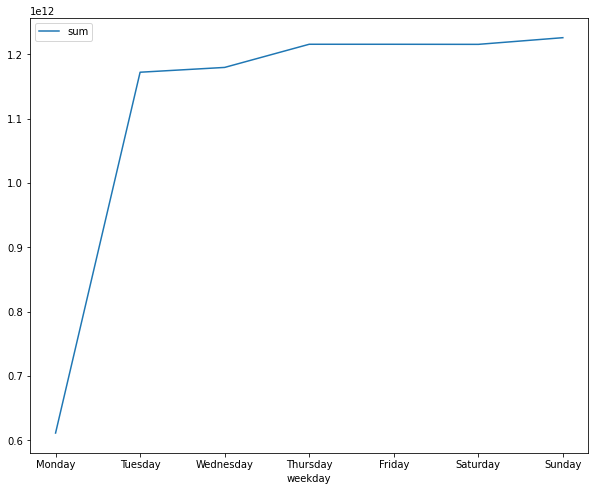

In [ ]:
df[['sum','weekday']].groupby('weekday').mean().plot()

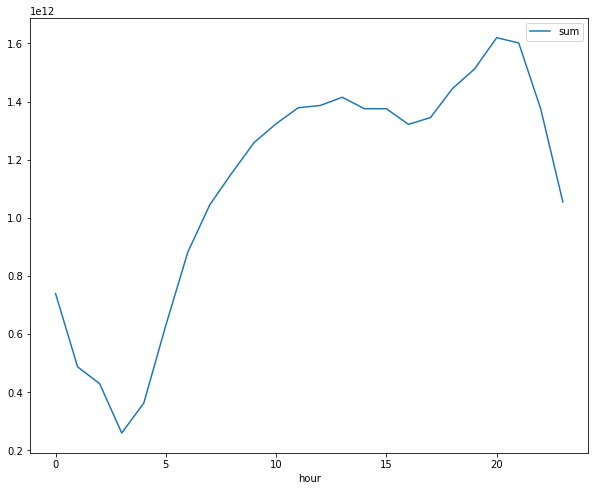

In [ ]:
df[['sum','hour']].groupby('hour').mean().plot()

In [ ]:
fig = px.line(df.reset_index(), x='Date',y='sum', title='Facebook Traffic')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [ ]:
model =  IsolationForest(contamination=0.05)
model.fit(df[['sum']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.05,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
df['outliers']=pd.Series(model.predict(df[['sum']])).apply(lambda x: 'yes' if (x == -1) else 'no' )
df.query('outliers=="yes"')

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum,hour,weekday,outliers
96,2020-12-06 20:00:00,1.905214e+11,1.896873e+11,1.580062e+11,1.609460e+11,1.582823e+11,7.366834e+10,8.971898e+10,1.288013e+11,1.442253e+11,1.330291e+11,1.266721e+11,1.188715e+11,1.592618e+11,1.923309e+07,2.023988e+07,1.998777e+07,2.064272e+07,1.333333e+04,1.831772e+12,20,Sunday,yes
97,2020-12-06 21:00:00,2.826008e+11,2.822928e+11,1.576537e+11,1.556915e+11,1.529752e+11,1.273350e+11,1.130558e+11,1.483453e+11,1.531566e+11,1.407243e+11,1.470319e+11,1.266987e+11,1.553400e+11,3.300903e+07,3.236329e+07,3.511511e+07,3.614246e+07,2.333333e+04,2.143038e+12,21,Sunday,yes
103,2020-12-07 03:00:00,1.000000e+03,2.001317e+10,2.415233e+10,4.846662e+10,2.125083e+10,1.911205e+10,1.117815e+10,1.737597e+10,2.121495e+10,1.843571e+10,1.931311e+10,1.577470e+10,2.431410e+10,3.298863e+07,2.418440e+07,3.520400e+07,3.629846e+07,4.000000e+03,2.540434e+11,3,Monday,yes
121,2020-12-07 21:00:00,NaN,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.873869e+10,4.873869e+10,21,Monday,yes
122,2020-12-07 22:00:00,NaN,8.333333e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+04,3.008433e+04,22,Monday,yes
124,2020-12-08 00:00:00,NaN,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+04,3.100100e+04,0,Tuesday,yes
125,2020-12-08 01:00:00,NaN,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.968054e+07,7.968154e+07,1,Tuesday,yes
127,2020-12-08 03:00:00,1.571277e+10,1.630164e+10,1.951945e+10,4.846662e+10,1.774355e+10,1.559975e+10,9.431609e+09,1.407208e+10,1.765356e+10,1.549882e+10,1.566026e+10,1.314558e+10,2.026175e+10,2.749053e+07,1.980367e+07,2.939957e+07,2.990586e+07,3.000000e+04,2.365553e+11,3,Tuesday,yes


In [ ]:
df

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum,hour,weekday,outliers
0,2020-12-02 20:00:00,1.091646e+11,1.083773e+11,1.589292e+11,1.603825e+11,1.572792e+11,1.262886e+11,1.198361e+11,1.426382e+11,1.568944e+11,1.458001e+11,1.392274e+11,1.305480e+11,1.587822e+11,3.297102e+07,3.469694e+07,3.426474e+07,3.538752e+07,NaN,1.814285e+12,20,Wednesday,no
1,2020-12-02 21:00:00,1.130866e+11,1.127900e+11,1.576537e+11,1.556915e+11,1.529752e+11,1.273350e+11,1.130558e+11,1.483453e+11,1.531566e+11,1.407243e+11,1.470319e+11,1.266987e+11,1.553400e+11,3.300903e+07,3.236329e+07,3.511511e+07,3.614246e+07,NaN,1.804021e+12,21,Wednesday,no
2,2020-12-02 22:00:00,1.049894e+11,1.044394e+11,1.556661e+11,1.505616e+11,1.242866e+11,1.128504e+11,8.284858e+10,1.353059e+11,1.345037e+11,1.093799e+11,1.404841e+11,1.034385e+11,1.441500e+11,3.315853e+07,2.811724e+07,3.506344e+07,3.605327e+07,NaN,1.603037e+12,22,Wednesday,no
3,2020-12-02 23:00:00,8.250833e+10,8.261981e+10,1.392679e+11,1.437921e+11,8.264501e+10,8.531265e+10,5.282191e+10,1.017513e+11,9.252370e+10,7.439685e+10,1.116362e+11,7.253967e+10,1.089908e+11,3.316705e+07,2.594754e+07,3.530171e+07,3.618012e+07,NaN,1.230937e+12,23,Wednesday,no
4,2020-12-03 00:00:00,5.759046e+10,5.865885e+10,9.862719e+10,1.383409e+11,5.254552e+10,5.657323e+10,3.087808e+10,6.618794e+10,5.945803e+10,4.751758e+10,7.546876e+10,4.652054e+10,7.427307e+10,3.312335e+07,2.453697e+07,3.517480e+07,3.613084e+07,NaN,8.627691e+11,0,Thursday,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2020-12-08 22:00:00,1.049894e+11,1.044394e+11,1.556661e+11,1.505616e+11,1.242866e+11,1.128504e+11,8.284858e+10,1.353059e+11,1.345037e+11,1.093799e+11,1.404841e+11,1.034385e+11,1.441500e+11,3.315853e+07,2.811724e+07,3.506344e+07,3.605327e+07,7000.0,1.603037e+12,22,Tuesday,no
147,2020-12-08 23:00:00,8.250833e+10,8.261981e+10,1.392679e+11,1.437921e+11,8.264501e+10,8.531265e+10,5.282191e+10,1.017513e+11,9.252370e+10,7.439685e+10,1.116362e+11,7.253967e+10,1.089908e+11,3.316705e+07,2.594754e+07,3.530171e+07,3.618012e+07,7000.0,1.230937e+12,23,Tuesday,no
148,2020-12-09 00:00:00,5.759046e+10,5.865885e+10,9.862719e+10,1.383409e+11,5.254552e+10,5.657323e+10,3.087808e+10,6.618794e+10,5.945803e+10,4.751758e+10,7.546876e+10,4.652054e+10,7.427307e+10,3.312335e+07,2.453697e+07,3.517480e+07,3.613084e+07,7000.0,8.627691e+11,0,Wednesday,no
149,2020-12-09 01:00:00,3.455193e+10,4.226319e+10,6.150741e+10,1.102689e+11,3.303702e+10,3.801937e+10,1.821858e+10,4.079944e+10,3.722842e+10,2.932231e+10,4.631562e+10,2.885004e+10,4.815199e+10,3.324921e+07,2.374537e+07,3.521523e+07,3.626869e+07,7000.0,5.686627e+11,1,Wednesday,no


In [ ]:
fig = px.scatter(df.reset_index(), x='Date', y='sum', color='outliers', hover_data=['weekday'], title='Facebook Traffic')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:286: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
#Isolation Forest Algorithm.
model =  IsolationForest()
model.fit(df[['sum']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
#classifiying {SVC, Logistic Regression} 
score=model.decision_function(df[['sum']])

score

array([-0.08545058,  0.0035338 ,  0.01129565,  0.02354231,  0.03803974,
        0.02902365,  0.01293961, -0.02853422,  0.02903478, -0.00178884,
        0.04751938,  0.03398961, -0.00764299, -0.01064128, -0.00516132,
        0.06003779,  0.06601791,  0.06040785,  0.07500824,  0.07625947,
        0.06775308,  0.04702877, -0.00092057, -0.05878969,  0.01206445,
        0.0035338 ,  0.01129565,  0.02354231,  0.03803974,  0.02902365,
        0.01293961, -0.02853422,  0.02903478,  0.01415008,  0.04751938,
        0.03398961, -0.00764299, -0.01064128, -0.00516132,  0.06003779,
        0.06601791,  0.06040785,  0.07500824,  0.07625947,  0.06775308,
        0.04702877, -0.00092057, -0.05878969,  0.00792194, -0.00474699,
       -0.01085468, -0.00202949,  0.01799628,  0.00528768,  0.01052103,
       -0.02853422,  0.01584574, -0.00151688,  0.04683623,  0.02354749,
       -0.01315242, -0.01634477, -0.01096345,  0.05499884,  0.06383989,
        0.0573146 ,  0.07210854,  0.07414473,  0.06530401,  0.04

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
         1.,  1.,  2.,  2.,  0.,  1.,  6.,  1.,  7.,  0.,  5.,  4., 12.,
        12., 13., 13.,  7., 12.,  2.,  5.,  9., 10., 10., 10.]),
 array([-0.31450316, -0.30668791, -0.29887265, -0.2910574 , -0.28324215,
        -0.27542689, -0.26761164, -0.25979639, -0.25198114, -0.24416588,
        -0.23635063, -0.22853538, -0.22072013, -0.21290487, -0.20508962,
        -0.19727437, -0.18945912, -0.18164386, -0.17382861, -0.16601336,
        -0.15819811, -0.15038285, -0.1425676 , -0.13475235, -0.12693709,
        -0.11912184, -0.11130659, -0.10349134, -0.09567608, -0.08786083,
        -0.08004558, -0.07223033, -0.06441507, -0.05659982, -0.04878457,
        -0.04096932, -0.03315406, -0.02533881, -0.01752356, -0.00970831,
        -0.00189305,  0.0059222 ,  0.01373745,  0.02155271,  0.02936796,
         0.03718321,  0.04499846,  0.05281372,  0.06062897,

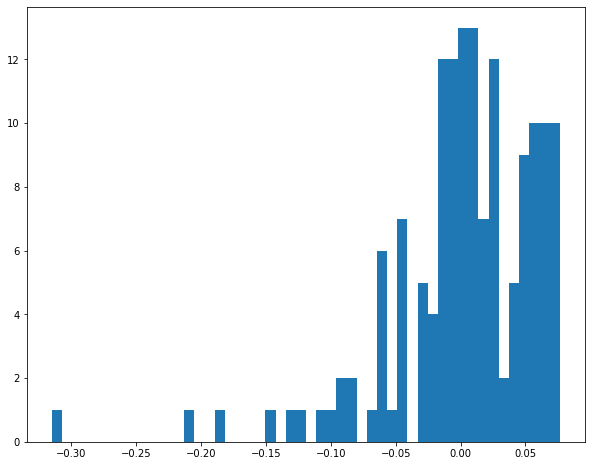

In [ ]:
plt.hist(score, bins=50)

In [ ]:
df['scores'] = score
df

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum,hour,weekday,outliers,scores
0,2020-12-02 20:00:00,1.091646e+11,1.083773e+11,1.589292e+11,1.603825e+11,1.572792e+11,1.262886e+11,1.198361e+11,1.426382e+11,1.568944e+11,1.458001e+11,1.392274e+11,1.305480e+11,1.587822e+11,3.297102e+07,3.469694e+07,3.426474e+07,3.538752e+07,NaN,1.814285e+12,20,Wednesday,no,-0.085451
1,2020-12-02 21:00:00,1.130866e+11,1.127900e+11,1.576537e+11,1.556915e+11,1.529752e+11,1.273350e+11,1.130558e+11,1.483453e+11,1.531566e+11,1.407243e+11,1.470319e+11,1.266987e+11,1.553400e+11,3.300903e+07,3.236329e+07,3.511511e+07,3.614246e+07,NaN,1.804021e+12,21,Wednesday,no,0.003534
2,2020-12-02 22:00:00,1.049894e+11,1.044394e+11,1.556661e+11,1.505616e+11,1.242866e+11,1.128504e+11,8.284858e+10,1.353059e+11,1.345037e+11,1.093799e+11,1.404841e+11,1.034385e+11,1.441500e+11,3.315853e+07,2.811724e+07,3.506344e+07,3.605327e+07,NaN,1.603037e+12,22,Wednesday,no,0.011296
3,2020-12-02 23:00:00,8.250833e+10,8.261981e+10,1.392679e+11,1.437921e+11,8.264501e+10,8.531265e+10,5.282191e+10,1.017513e+11,9.252370e+10,7.439685e+10,1.116362e+11,7.253967e+10,1.089908e+11,3.316705e+07,2.594754e+07,3.530171e+07,3.618012e+07,NaN,1.230937e+12,23,Wednesday,no,0.023542
4,2020-12-03 00:00:00,5.759046e+10,5.865885e+10,9.862719e+10,1.383409e+11,5.254552e+10,5.657323e+10,3.087808e+10,6.618794e+10,5.945803e+10,4.751758e+10,7.546876e+10,4.652054e+10,7.427307e+10,3.312335e+07,2.453697e+07,3.517480e+07,3.613084e+07,NaN,8.627691e+11,0,Thursday,no,0.038040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2020-12-08 22:00:00,1.049894e+11,1.044394e+11,1.556661e+11,1.505616e+11,1.242866e+11,1.128504e+11,8.284858e+10,1.353059e+11,1.345037e+11,1.093799e+11,1.404841e+11,1.034385e+11,1.441500e+11,3.315853e+07,2.811724e+07,3.506344e+07,3.605327e+07,7000.0,1.603037e+12,22,Tuesday,no,0.011296
147,2020-12-08 23:00:00,8.250833e+10,8.261981e+10,1.392679e+11,1.437921e+11,8.264501e+10,8.531265e+10,5.282191e+10,1.017513e+11,9.252370e+10,7.439685e+10,1.116362e+11,7.253967e+10,1.089908e+11,3.316705e+07,2.594754e+07,3.530171e+07,3.618012e+07,7000.0,1.230937e+12,23,Tuesday,no,0.023542
148,2020-12-09 00:00:00,5.759046e+10,5.865885e+10,9.862719e+10,1.383409e+11,5.254552e+10,5.657323e+10,3.087808e+10,6.618794e+10,5.945803e+10,4.751758e+10,7.546876e+10,4.652054e+10,7.427307e+10,3.312335e+07,2.453697e+07,3.517480e+07,3.613084e+07,7000.0,8.627691e+11,0,Wednesday,no,0.038040
149,2020-12-09 01:00:00,3.455193e+10,4.226319e+10,6.150741e+10,1.102689e+11,3.303702e+10,3.801937e+10,1.821858e+10,4.079944e+10,3.722842e+10,2.932231e+10,4.631562e+10,2.885004e+10,4.815199e+10,3.324921e+07,2.37453

In [ ]:
df.query('scores<-0.10')

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum,hour,weekday,outliers,scores
71,2020-12-05 19:00:00,1.032887e+11,1.040970e+11,1.506575e+11,1.540219e+11,1.550322e+11,1.243808e+11,1.155784e+11,1.365971e+11,1.554259e+11,1.355292e+11,1.345360e+11,1.204218e+11,1.563786e+11,3.727799e+06,3.847553e+06,3.869789e+06,3.796772e+06,4.886311e+06,1.745965e+12,19,Saturday,no,-0.104868
96,2020-12-06 20:00:00,1.905214e+11,1.896873e+11,1.580062e+11,1.609460e+11,1.582823e+11,7.366834e+10,8.971898e+10,1.288013e+11,1.442253e+11,1.330291e+11,1.266721e+11,1.188715e+11,1.592618e+11,1.923309e+07,2.023988e+07,1.998777e+07,2.064272e+07,1.333333e+04,1.831772e+12,20,Sunday,yes,-0.143068
97,2020-12-06 21:00:00,2.826008e+11,2.822928e+11,1.576537e+11,1.556915e+11,1.529752e+11,1.273350e+11,1.130558e+11,1.483453e+11,1.531566e+11,1.407243e+11,1.470319e+11,1.266987e+11,1.553400e+11,3.300903e+07,3.236329e+07,3.511511e+07,3.614246e+07,2.333333e+04,2.143038e+12,21,Sunday,yes,-0.314503
121,2020-12-07 21:00:00,NaN,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.873869e+10,4.873869e+10,21,Monday,yes,-0.211400
122,2020-12-07 22:00:00,NaN,8.333333e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+04,3.008433e+04,22,Monday,yes,-0.127685
125,2020-12-08 01:00:00,NaN,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.968054e+07,7.968154e+07,1,Tuesday,yes,-0.183233
127,2020-12-08 03:00:00,1.571277e+10,1.630164e+10,1.951945e+10,4.846662e+10,1.774355e+10,1.559975e+10,9.431609e+09,1.407208e+10,1.765356e+10,1.549882e+10,1.566026e+10,1.314558e+10,2.026175e+10,2.749053e+07,1.980367e+07,2.939957e+07,2.990586e+07,3.000000e+04,2.365553e+11,3,Tuesday,yes,-0.124298


**Accuracy percentage**

In [ ]:
anomaly=len(df[df['outliers']=="yes"])
outliers_counter = len(df[df['scores'] < -0.10])
print("Accuracy percentage:", 100*(outliers_counter)/anomaly)

Accuracy percentage: 87.5
